In [11]:
import keras
import numpy as np
import scipy.io
from pathlib import Path
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

## Open labels

In [2]:
path = 'C:\\Users\\Rodolfo\\Documents\\algoritmos-git\\custom_cnn\\Data\\Processados\\'

In [3]:
y_train = np.load(Path(path,'y_train.npy'))
y_test = np.load(Path(path, 'y_test.npy'))
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [4]:
from keras.utils import np_utils
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [6]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Open data

In [7]:
path = Path(path, '28_28')
X_train_1 = np.load(Path(path, 'X_train_1.npy'))
X_train_2 = np.load(Path(path, 'X_train_2.npy'))
X_test_1 = np.load(Path(path, 'X_test_1.npy'))
X_test_2 = np.load(Path(path, 'X_test_2.npy'))
print(X_train_1.shape)
print(X_train_2.shape)
print(X_test_1.shape)
print(X_test_2.shape)

(2200, 28, 28)
(2200, 28, 28)
(1000, 28, 28)
(1000, 28, 28)


In [16]:
# Empilhei uma imagem abaixo da outra
X_train_ = np.append(X_train_1, X_train_2, axis=1)
X_train_.shape

(2200, 56, 28)

In [17]:
# Empilhei uma imagem abaixo da outra
X_test_ = np.append(X_test_1, X_test_2, axis=1)
X_test_.shape

(1000, 56, 28)

In [12]:
def plt_img(img_matrix, title='Image', normalize=False):
    if normalize:
        plt.imshow(img_matrix, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap='gray')
    else:
        io.imshow(img_matrix)
    plt.title(title)
    plt.show()

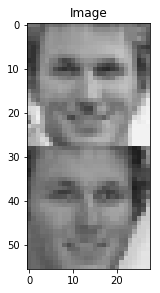

In [18]:
plt_img(X_train_[0]) # train: instance 1: path_pair_id_1_cropped and path_pair_id_2_cropped

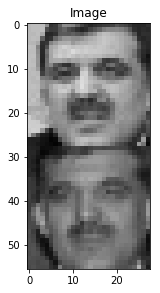

In [19]:
plt_img(X_test_[0]) # test: instance 1: path_pair_id_1_cropped and path_pair_id_2_cropped

### Shape desejado: x_train shape: (45000, 32, 32, 3) -> n_obs, n_row, n_col, n_chan

In [20]:
n_obs, n_row, n_col = X_train_.shape
n_chan=1
X_train = np.zeros((n_obs, n_row, n_col, n_chan))
X_train.shape

(2200, 56, 28, 1)

In [21]:
X_train[:,:,:,0]=X_train_
X_train.shape

(2200, 56, 28, 1)

In [37]:
X_train[:,:,:,0].shape

(2200, 56, 28)

In [22]:
n_obs, n_row, n_col = X_test_.shape
n_chan=1
X_test = np.zeros((n_obs, n_row, n_col, n_chan))
X_test.shape

(1000, 56, 28, 1)

In [23]:
X_test[:,:,:,0]=X_test_
X_test.shape

(1000, 56, 28, 1)

In [25]:
X_test[:,:,:,0].shape

(1000, 56, 28)

# Shuffle X_train

In [38]:
arr = np.arange(y_train.shape[0])
np.random.shuffle(arr)
X_train = X_train[arr,:,:,:]
y_train = y_train[arr]

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [39]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [40]:
# break training set into training and validation sets
(X_train, X_valid) = X_train[:1800], X_train[1800:]
(y_train, y_valid) = y_train[:1800], y_train[1800:]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

x_train shape: (1800, 56, 28, 1)
1800 train samples
1000 test samples
400 validation samples


### 5. Define the Model Architecture 

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', strides=(1,1), input_shape=(56, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', strides=(2,2)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 7, 32)         2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 3, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 1, 64)          0         
______________________

### 6. Compile the Model 

In [42]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [43]:
from keras.callbacks import ModelCheckpoint   

# train the model
model_path = 'model_2.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=5, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=500,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer], 
          verbose=5, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1800 samples, validate on 400 samples
Epoch 1/500






Epoch 00001: val_loss improved from inf to 0.69434, saving model to model_2.weights.best.hdf5
Epoch 2/500

Epoch 00002: val_loss did not improve from 0.69434
Epoch 3/500

Epoch 00003: val_loss did not improve from 0.69434
Epoch 4/500

Epoch 00004: val_loss improved from 0.69434 to 0.69414, saving model to model_2.weights.best.hdf5
Epoch 5/500

Epoch 00005: val_loss improved from 0.69414 to 0.69268, saving model to model_2.weights.best.hdf5
Epoch 6/500

Epoch 00006: val_loss did not improve from 0.69268
Epoch 7/500

Epoch 00007: val_loss did not improve from 0.69268
Epoch 8/500

Epoch 00008: val_loss improved from 0.69268 to 0.69202, saving model to model_2.weights.best.hdf5
Epoch 9/500

Epoch 00009: val_loss did not improve from 0.69202
Epoch 10/500

Epoch 00010: val_loss improved from 0.69202 to 0.69154, saving model to model


Epoch 00092: val_loss did not improve from 0.68874
Epoch 93/500

Epoch 00093: val_loss did not improve from 0.68874
Epoch 94/500

Epoch 00094: val_loss did not improve from 0.68874
Epoch 95/500

Epoch 00095: val_loss did not improve from 0.68874
Epoch 96/500

Epoch 00096: val_loss did not improve from 0.68874
Epoch 97/500

Epoch 00097: val_loss did not improve from 0.68874
Epoch 98/500

Epoch 00098: val_loss did not improve from 0.68874
Epoch 99/500

Epoch 00099: val_loss did not improve from 0.68874
Epoch 100/500

Epoch 00100: val_loss did not improve from 0.68874
Epoch 101/500

Epoch 00101: val_loss did not improve from 0.68874
Epoch 102/500

Epoch 00102: val_loss did not improve from 0.68874
Epoch 103/500

Epoch 00103: val_loss did not improve from 0.68874
Epoch 104/500

Epoch 00104: val_loss did not improve from 0.68874
Epoch 105/500

Epoch 00105: val_loss did not improve from 0.68874
Epoch 106/500

Epoch 00106: val_loss did not improve from 0.68874
Epoch 107/500

Epoch 00107: val


Epoch 00217: val_loss did not improve from 0.68874
Epoch 218/500

Epoch 00218: val_loss did not improve from 0.68874
Epoch 219/500

Epoch 00219: val_loss did not improve from 0.68874
Epoch 220/500

Epoch 00220: val_loss did not improve from 0.68874
Epoch 221/500

Epoch 00221: val_loss did not improve from 0.68874
Epoch 222/500

Epoch 00222: val_loss did not improve from 0.68874
Epoch 223/500

Epoch 00223: val_loss did not improve from 0.68874
Epoch 224/500

Epoch 00224: val_loss did not improve from 0.68874
Epoch 225/500

Epoch 00225: val_loss did not improve from 0.68874
Epoch 226/500

Epoch 00226: val_loss did not improve from 0.68874
Epoch 227/500

Epoch 00227: val_loss did not improve from 0.68874
Epoch 228/500

Epoch 00228: val_loss did not improve from 0.68874
Epoch 229/500

Epoch 00229: val_loss did not improve from 0.68874
Epoch 230/500

Epoch 00230: val_loss did not improve from 0.68874
Epoch 231/500

Epoch 00231: val_loss did not improve from 0.68874
Epoch 232/500

Epoch 002


Epoch 00342: val_loss did not improve from 0.68874
Epoch 343/500

Epoch 00343: val_loss did not improve from 0.68874
Epoch 344/500

Epoch 00344: val_loss did not improve from 0.68874
Epoch 345/500

Epoch 00345: val_loss did not improve from 0.68874
Epoch 346/500

Epoch 00346: val_loss did not improve from 0.68874
Epoch 347/500

Epoch 00347: val_loss did not improve from 0.68874
Epoch 348/500

Epoch 00348: val_loss did not improve from 0.68874
Epoch 349/500

Epoch 00349: val_loss did not improve from 0.68874
Epoch 350/500

Epoch 00350: val_loss did not improve from 0.68874
Epoch 351/500

Epoch 00351: val_loss did not improve from 0.68874
Epoch 352/500

Epoch 00352: val_loss did not improve from 0.68874
Epoch 353/500

Epoch 00353: val_loss did not improve from 0.68874
Epoch 354/500

Epoch 00354: val_loss did not improve from 0.68874
Epoch 355/500

Epoch 00355: val_loss did not improve from 0.68874
Epoch 356/500

Epoch 00356: val_loss did not improve from 0.68874
Epoch 357/500

Epoch 003


Epoch 00467: val_loss did not improve from 0.68874
Epoch 468/500

Epoch 00468: val_loss did not improve from 0.68874
Epoch 469/500

Epoch 00469: val_loss did not improve from 0.68874
Epoch 470/500

Epoch 00470: val_loss did not improve from 0.68874
Epoch 471/500

Epoch 00471: val_loss did not improve from 0.68874
Epoch 472/500

Epoch 00472: val_loss did not improve from 0.68874
Epoch 473/500

Epoch 00473: val_loss did not improve from 0.68874
Epoch 474/500

Epoch 00474: val_loss did not improve from 0.68874
Epoch 475/500

Epoch 00475: val_loss did not improve from 0.68874
Epoch 476/500

Epoch 00476: val_loss did not improve from 0.68874
Epoch 477/500

Epoch 00477: val_loss did not improve from 0.68874
Epoch 478/500

Epoch 00478: val_loss did not improve from 0.68874
Epoch 479/500

Epoch 00479: val_loss did not improve from 0.68874
Epoch 480/500

Epoch 00480: val_loss did not improve from 0.68874
Epoch 481/500

Epoch 00481: val_loss did not improve from 0.68874
Epoch 482/500

Epoch 004

### 8. Load the Model with the Best Validation Accuracy

In [44]:
# load the weights that yielded the best validation accuracy
model.load_weights(model_path)

### 9. Calculate Classification Accuracy on Test Set

In [45]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.487
